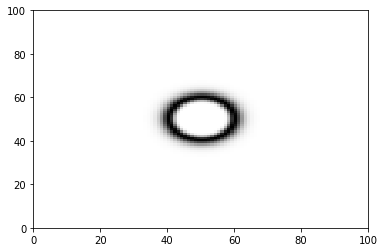

In [1]:
import math ###circlelikelihood
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import multivariate_normal

def likelihood(x, y):
    suggest_pos = np.array([math.sqrt(x*x + y*y), 0.0]).T #(x,y)から予想されるランドマーク計測値

    distance_dev = 0.14*(suggest_pos[0] + 0.01) #距離に対する雑音（0にしないために0.01を付加）
    cov = np.diag(np.array([distance_dev**2, 0.05**2])) #雑音の共分散行列を作る
    return multivariate_normal(mean=suggest_pos, cov=cov).pdf(np.array([1.0, 0]).T) #実測値と比較
            
z = []
for y in np.arange(-5.0, 5.0, 0.1): #-5[m]から5[m]まで0.1[m]刻みでリストを作成
    tmp = []
    for x in np.arange(-5.0, 5.0, 0.1):
        tmp.append(likelihood(x, y))
    
    z.append(tmp)

plt.pcolor(z, cmap=plt.cm.binary)
plt.show()